<a href="https://colab.research.google.com/github/Hamza1122/Deep-Learning-Ass/blob/master/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<strong><h1>Efficient Training of Convolutional Neural Network </h1></strong>



<h2> What to submit </h2>

<ol>
<li>	Your Python notebook solution source file. </li>
<li>	The output of your Python notebook solution <emph>exported</emph> in HTML format.</li>
<li>	Extra files needed to complete your task, if any (e.g., images used in your answers).</li>
</ol>
</p>


<h2> Warning </h2>

Some components of this task may involve heavy computation that runs for a long duration. Please start early to avoid missing the due date.

<h2> Marking criteria </h2>

<p>
Your submission will be assessed using the following criteria.

<ul>
<li> Showing good effort through completed tasks.</li>
<li> Applying deep learning theory to design suitable deep learning solutions for the tasks.</li>
<li> Critically evaluating and reflecting on the pros and cons of various design decisions.</li>
<li> Demonstrating creativity and resourcefulness in providing unique individual solutions.</li>
<li> Showing attention to details through a good quality  report.</li>
</ul>
</p>

<p>
Indicative weights of various tasks are provided, but the task will be assessed by the overall quality per the above criteria.
</p>
</div>

## Task objective

You will experience training a much deeper network on a large-scale dataset. 

## Task 1 Solving Fashion-MNIST with Convolutional Neural Networks


In previous task, you tackled the image classification problem in Fashion-MNIST. There, you used a Densely Connected Neural Network. You should now know that is not an optimal model architecture for the problem. In this task, you will apply the best practices of deep-learning computer vision to improve the image classification performance.

### Task 1.1 Revisit Fashion-MNIST classification with DNN


Review your previous tasks solution, and reproduce the experiment here. Try to improve the model without changing the model architecture.


In [2]:
# Loading the mnist dataset with Keras
#importing libraries
import numpy as np
import time
import keras
import matplotlib.pyplot as plt
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot

from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras import models, layers
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import models
from keras.models import Model
from keras import layers
from keras import optimizers
from keras import callbacks
from keras.layers.advanced_activations import LeakyReLU


from sklearn.model_selection import train_test_split


tfds.disable_progress_bar()
tf.enable_v2_behavior()


(ds_train, ds_test), ds_info = tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']                  


# preprocessing using pipelining
def preprocess(features):
    image = features['image']
    image = tf.image.resize(image, (28,28))
    image = image / 255.0
    return image, features['label']  


#creating input pipeline
ds_train = ds_train.map(
    preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)


#ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)   



#creating pipeling for test images
ds_test = ds_test.map(
    preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)


import datetime
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)
path="logs/fit/" +datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1,write_graph=True)


#setting up a model for training
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

from keras.utils.vis_utils import plot_model
model.summary()
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompleteHGENB2/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompleteHGENB2/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.0. Subsequent calls will reuse this data.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      


In [26]:
# We are using Gradient Norm With Adam
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.001,clipnorm=1.0),metrics=['accuracy'])
history=model.fit(ds_train,epochs=1,validation_data=ds_test,callbacks=[callback])

      1/Unknown - 0s 94us/step - loss: 2.3340 - accuracy: 0.0781WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


469/469 [==============================] - 2s 4ms/step - loss: 0.5365 - accuracy: 0.8126 - val_loss: 0.4423 - val_accuracy: 0.8423


### Task 1.2 Train a ConvNet from scratch


Build a ConvNet to replace the densely connected network in Task 1.1. Report the classification accuracy on the test set. Aim to achieve higher accuracy. 



In [27]:
#Now Using CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [28]:
from keras.utils.vis_utils import plot_model
model.summary()
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_32 (Dense)             (None, 10)              

In [29]:
# We are using Gradient Norm With Adam
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.001,clipnorm=1.0),metrics=['accuracy'])
history=model.fit(ds_train,epochs=10,validation_data=ds_test,callbacks=[callback])

Epoch 1/10
      2/Unknown - 0s 30ms/step - loss: 2.2747 - accuracy: 0.1055WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0192s vs `on_train_batch_end` time: 0.0406s). Check your callbacks.


469/469 [==============================] - 10s 21ms/step - loss: 0.5208 - accuracy: 0.8144 - val_loss: 0.3801 - val_accuracy: 0.8642
Epoch 2/10
469/469 [==============================] - 10s 21ms/step - loss: 0.3363 - accuracy: 0.8781 - val_loss: 0.3323 - val_accuracy: 0.8780
Epoch 3/10
469/469 [==============================] - 10s 21ms/step - loss: 0.2892 - accuracy: 0.8950 - val_loss: 0.3089 - val_accuracy: 0.8879
Epoch 4/10
469/469 [==============================] - 10s 21ms/step - loss: 0.2573 - accuracy: 0.9060 - val_loss: 0.2911 - val_accuracy: 0.8943
Epoch 5/10
469/469 [==============================] - 10s 21ms/step - loss: 0.2342 - accuracy: 0.9144 - val_loss: 0.2827 - val_accuracy: 0.8973
Epoch 6/10
469/469 [==============================] - 10s 21ms/step - loss: 0.2152 - accuracy: 0.9204 - val_loss: 0.2541 - val_accuracy: 0.9057
Epoch 7/10
469/469 [==============================] - 10s 21ms/step - loss: 0.1980 - accuracy: 0.9275 - val_loss: 0.2474 - val_accuracy: 0.9078
Epo

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


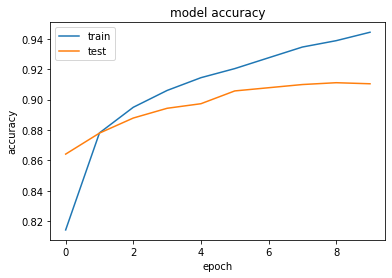

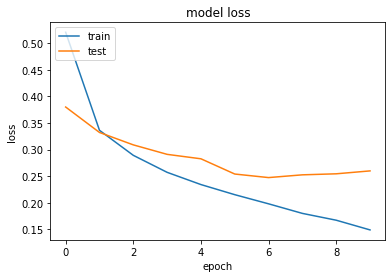

In [30]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Task 1.3 Build an input pipeline for data augmentation


Build a data preprocessing pipeline to perform data augmentation. (You may use Keras ImageDataGenerator or write your own transformations.)

- Report the new classification accuracy. Make sure that you use the same number of training epochs as in Task 1.2.

- Profile your input pipeline to identify the most time-consuming operation. What actions have you taken to address that slow operation? (*Hint: You may use the [TensorFlow Profiler](https://github.com/tensorflow/profiler).*)

In [31]:
#Data Augmentation
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])


#Now Using CNN
model = tf.keras.models.Sequential([
    resize_and_rescale,
    data_augmentation,                                
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])




In [ ]:
# We are using Gradient Norm With Adam

#training remaining
#model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.001,clipnorm=1.0),metrics=['accuracy'])
#history=model.fit(ds_train,epochs=10,validation_data=ds_test,callbacks=[callback])

### Task 1.4 Fashion-MNIST with transfer learning



Use a pretrained model as the convolutional base to improve the classification performance. (Hint: You may use models in Keras Applications or those in the TensorFlow Hub.)

- Try both with fine-tuning and without fine-tuning.
- Report the model performance as before.



In [34]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()
X_train = np.dstack([trainX] * 3)
X_test = np.dstack([testX]*3)

4423680/4422102 [==============================] - 0s 0us/step


In [35]:
X_train = X_train.reshape(-1, 28,28,3)
X_test= X_test.reshape (-1,28,28,3)

# Display the new shape
X_train.shape, X_test.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [36]:
train_X = X_train / 255.
test_X = X_train / 255.
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [37]:
from keras.preprocessing.image import img_to_array, array_to_img

train_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in train_X])
test_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in test_X])
#train_x = preprocess_input(x)
train_X.shape, test_X.shape

((60000, 48, 48, 3), (60000, 48, 48, 3))

In [38]:
# Normalise the data and change data type
train_X = train_X / 255.
test_X = test_X / 255.
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [39]:
train_Y_one_hot = to_categorical(trainY)
test_Y_one_hot = to_categorical(testY)

In [40]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X,
                                                           train_Y_one_hot,
                                                           test_size=0.2,
                                                           random_state=13
                                                           )

In [41]:
# Finally check the data size whether it is as per tensorflow and VGG16 requirement
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 48, 48, 3), (12000, 48, 48, 3), (48000, 10), (12000, 10))

In [44]:
IMG_WIDTH = 48
IMG_HEIGHT = 48
IMG_DEPTH = 3
BATCH_SIZE = 16

In [45]:
train_X = preprocess_input(train_X)
valid_X = preprocess_input(valid_X)
test_X  = preprocess_input (test_X)

In [47]:
conv_base = keras.applications.vgg16.VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH)
                 )
conv_base.summary()



58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
______________________________________________________________

In [48]:
train_features = conv_base.predict(np.array(train_X), batch_size=BATCH_SIZE, verbose=1)
test_features = conv_base.predict(np.array(test_X), batch_size=BATCH_SIZE, verbose=1)
val_features = conv_base.predict(np.array(valid_X), batch_size=BATCH_SIZE, verbose=1)

750/750 [==============================] - 30s 40ms/step


In [55]:
np.savez("train_features", train_features, train_label)
np.savez("test_features", test_features, testY)
np.savez("val_features", val_features, valid_label)


In [56]:
print(train_features.shape, "\n",  test_features.shape, "\n", val_features.shape)

(48000, 1, 1, 512) 
 (60000, 1, 1, 512) 
 (12000, 1, 1, 512)


In [57]:
train_features_flat = np.reshape(train_features, (48000, 1*1*512))
#test_features_flat = np.reshape(test_features, (10000, 1*1*512))
val_features_flat = np.reshape(val_features, (12000, 1*1*512))

In [58]:
NB_TRAIN_SAMPLES = train_features_flat.shape[0]
NB_VALIDATION_SAMPLES = val_features_flat.shape[0]
NB_EPOCHS = 100

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Dense(10, activation='softmax'))

In [59]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(),
  # optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])

In [60]:
# Train the Model
history = model.fit(
    train_features_flat,
    train_label,
    epochs=2,
    validation_data=(val_features_flat, valid_label),
  # callbacks=callbacks
)

Epoch 1/2
1500/1500 [==============================] - 4s 3ms/step - loss: 2.4444 - acc: 0.0989 - val_loss: 2.4277 - val_acc: 0.0993
Epoch 2/2
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3552 - acc: 0.0994 - val_loss: 2.3215 - val_acc: 0.0993


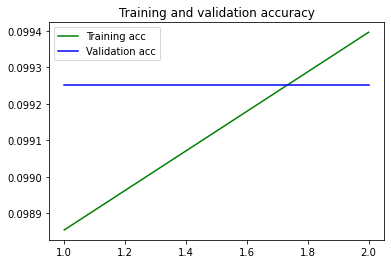

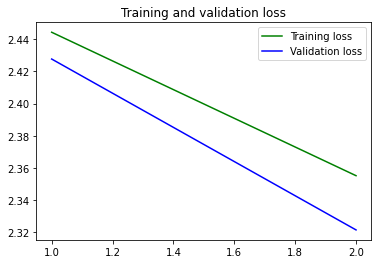

In [61]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [62]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(conv_base.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in conv_base.layers[:fine_tune_at]:
  layer.trainable =  False


for layer in conv_base.layers:
    print(layer, layer.trainable)


Number of layers in the base model:  19
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fb968f66278> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb968f66320> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb967c6d630> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fb967c6dba8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb968f35eb8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb967cd0b38> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fb967cd02b0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb967cd2160> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb969cc58d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fba3f444ac8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fb967ccc278> False
<tensorflow.python.kera

In [63]:
train_features = conv_base.predict(np.array(train_X), batch_size=BATCH_SIZE, verbose=1)
test_features = conv_base.predict(np.array(test_X), batch_size=BATCH_SIZE, verbose=1)
val_features = conv_base.predict(np.array(valid_X), batch_size=BATCH_SIZE, verbose=1)
train_features_flat = np.reshape(train_features, (48000, 1*1*512))
#test_features_flat = np.reshape(test_features, (10000, 1*1*512))
val_features_flat = np.reshape(val_features, (12000, 1*1*512))


750/750 [==============================] - 24s 32ms/step


In [64]:

NB_TRAIN_SAMPLES = train_features_flat.shape[0]
NB_VALIDATION_SAMPLES = val_features_flat.shape[0]
NB_EPOCHS = 100

model2 = models.Sequential()
model2.add(Flatten())
model2.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
model2.add(layers.LeakyReLU(alpha=0.1))
model2.add(layers.Dense(10, activation='softmax'))

In [65]:
model2.compile(loss='categorical_crossentropy',

              optimizer=optimizers.RMSprop(lr=1e-4),

              metrics=['acc'])
 


In [66]:
fine_tune_epochs = 10
total_epochs =  1 + fine_tune_epochs

In [67]:
history = model2.fit(train_features_flat,
                        train_label,
                         epochs=20,
                       #  initial_epoch=history.epoch[-1],
                         validation_data=(val_features_flat, valid_label),
                         )

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3481 - acc: 0.1001 - val_loss: 2.3273 - val_acc: 0.0983
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3298 - acc: 0.0990 - val_loss: 2.3251 - val_acc: 0.0993
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3297 - acc: 0.0995 - val_loss: 2.3309 - val_acc: 0.1016
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3289 - acc: 0.0999 - val_loss: 2.3319 - val_acc: 0.0990
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3286 - acc: 0.1001 - val_loss: 2.3213 - val_acc: 0.0980
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3273 - acc: 0.1002 - val_loss: 2.3359 - val_acc: 0.0964
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3274 - acc: 0.1000 - val_loss: 2.3554 - val_acc: 0.1016
Epoch 8/20
1500/1500 [==============================] - 4s 3ms

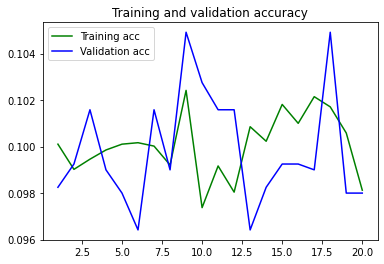

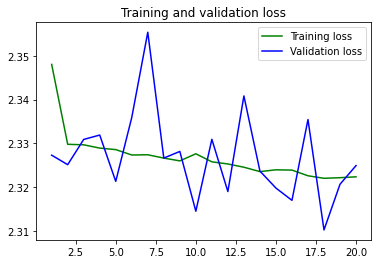

In [68]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

### Task 1.5 Performance comparison


Record the test accuracy achieved at different training configurations above. Which method achieved the highest accuracy? Why did it work better for this problem?


## Task 2 Fast training of deep networks

###### Task 2.1 Train a highly accurate network for CIFAR10


In this task, you will train deep neural networks on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). Compared with the datasets that you have worked on so far, CIFAR10 represents a relatively larger multi-class classification problem and presents a great opportunity for you to solve a "harder" problem.



#### Task 2.1.1 Document the hardware used

Before you start, write down your hardware specifications, including 

- the GPU model, the number of GPUs, and the GPU memory
- the CPU model, the number of CPUs, and the CPU clock speed

(Hint: you may find commands like `nvidia-smi`, `lscpu` or `psutil` useful.)

In [3]:
!nvidia-smi

Thu Sep 10 16:22:01 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    40W / 250W |    425MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [84]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              40
On-line CPU(s) list: 0-39
Thread(s) per core:  2
Core(s) per socket:  20
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Stepping:            0
CPU MHz:             2300.000
BogoMIPS:            4600.00
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            46080K
NUMA node0 CPU(s):   0-39
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd i

#### Task 2.1.2 Train a "shallow" ConvNet

Build a ConvNet with fewer than 10 layers. Train the network until it converges. You will use this network as a baseline for the later experiments. 

- Plot the training and validation history. 
- Report the testing accuracy. 

In [87]:
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils as u
from keras.datasets import cifar10
from keras.applications import VGG19,ResNet50

#Lets start by loading the Cifar10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train.astype('float32')/255.0, x_test.astype('float32')/255.0
y_train, y_test = u.to_categorical(y_train, 10), u.to_categorical(y_test, 10)


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same',
                 activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(momentum=0.5, decay=0.0004), metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2,
          batch_size=512)


Epoch 1/2
98/98 [==============================] - 16s 165ms/step - loss: 2.3017 - accuracy: 0.1016 - val_loss: 2.3012 - val_accuracy: 0.1286
Epoch 2/2
98/98 [==============================] - 15s 155ms/step - loss: 2.2999 - accuracy: 0.1068 - val_loss: 2.3000 - val_accuracy: 0.1314


#### Task 2.1.3 Train a ResNet

Train a residual neural network (ResNet) on the CIFAR10 training data and report the test accuracy and the training time.

The ResNet is a popular network architecture for image classification. You may find more information about how ResNet works by reading this [paper](https://arxiv.org/abs/1512.03385).


*(You may implement a resnet model or use an existing implementation. In either case, you should not use pretrained network weights.)*

In [95]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))
base_model_2 = ResNet50(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=y_train.shape[1])

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))
((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))
94773248/94765736 [==============================] - 1s 0us/step


In [96]:
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau

model_1= Sequential()
model_1.add(base_model_2) #Adds the base model (in this case vgg19 to model_1)
model_1.add(Flatten())
#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(1024,activation=('relu'),input_dim=512))
model_1.add(Dense(512,activation=('relu'))) 
model_1.add(Dense(256,activation=('relu'))) 
#model_1.add(Dropout(.3))#Adding a dropout layer that will randomly drop 30% of the weights
model_1.add(Dense(128,activation=('relu')))
#model_1.add(Dropout(.2))
model_1.add(Dense(10,activation=('softmax'))) #This is the classification layer
learn_rate=.001

sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
model_1.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model_1.fit(x_train,
                       y_train,
                         epochs=1,
                         )

1094/1094 [==============================] - 258s 236ms/step - loss: 1.3767 - accuracy: 0.5144


### Task 2.2 Fast training of ResNet


In this task, you will experiment with different ways to reduce the time for training your ResNet on CIFAR10. There are different ways to speed up neural network training; below are two ideas. Please select at least one idea to implement. Explain the experiment steps and report the final performance and training time.

#### Option 1. Learning rate schedule

Use a learning rate schedule for the training. Some popular learning rate schedules include 

- the Step Decay learning rate (e.g., see [here](https://github.com/kuangliu/pytorch-cifar))
- [Cyclical learning rates](https://arxiv.org/abs/1506.01186)
- [The exponential learning rate](https://openreview.net/forum?id=rJg8TeSFDH) 

Also Keras provides [some convenient functions](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules) that you can use.


#### Option 2. Look ahead optimiser

Read [this paper](https://arxiv.org/abs/1907.08610) and implement the Lookahead optimiser.

In [90]:
#Option 1
!git clone https://github.com/bckenstler/CLR.git
#adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

Cloning into 'CLR'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 252 (delta 1), reused 4 (delta 0), pack-reused 244
Receiving objects: 100% (252/252), 2.06 MiB | 12.85 MiB/s, done.
Resolving deltas: 100% (87/87), done.


In [91]:
cd /content/CLR 


/content/CLR


In [97]:
from keras.callbacks import *
from clr_callback import *
from keras.optimizers import Adam
import math

#Exponential Decay
def exp_decay(t):
   initial_lrate = 0.1
   k = 0.1
   lrate = initial_lrate * math.exp(-k*t)
   return lrate
lrate = LearningRateScheduler(exp_decay)


#Exponential Learning Rate
def scheduler(epoch, lr):
     if epoch < 10:
       return lr
     else:
       return lr * math.exp(-0.1)


#Cyclic Learning Rates
clr_triangular = CyclicLR(mode='triangular')


In [98]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
model_1.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history = model_1.fit(x_train,
                       y_train,
                         epochs=1,
                      callbacks=[clr_triangular,callback,lrate],
                    
                         )

1094/1094 [==============================] - 296s 271ms/step - loss: 1.3251 - accuracy: 0.5437


In [ ]:
cd ..

/content


In [100]:
#Option 2 lookahed optimizer


In [101]:
import tensorflow_addons as tfa
opt = tf.keras.optimizers.SGD(lr=0.001)
opt = tfa.optimizers.Lookahead(opt)
model_1.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])


In [102]:
history = model_1.fit(x_train,
                       y_train,
                         epochs=1)

1094/1094 [==============================] - 437s 400ms/step - loss: 2.2476 - accuracy: 0.1680


### Task 2.3 Performance comparison


Based on the above experiments, which method or which combination of methods result in the best accuracy with the same training time.

## Task 3 Design a novel deep neural network model 
Here, you have to show your critical idea to design a new neural network model. We will evaluate your results based on the novelty of the model and performance of the model. 

### Task 3.1: The key idea to design a novel deep neural networks for CIFAR10


In this task, you will design a novel deep neural networks on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). CIFAR10 represents a relatively larger multi-class classification problem and presents a great opportunity for you to solve a "harder" problem. Different from Task 2, in this task you are required to design a novel neural network and optimize the performance in classification. In your answer, you have to clearly present what the key difference between your model and the classic ones, what the benefits in your design model.

### Task 3.2: The implementation of the novel deep neural networks for CIFAR10



In this task, it requires you to write the codes for model implementation and report the performance. In your results, you have to demonstrate the compared performance of your new model and the state-of-the-art models.

In [103]:

(x_train,y_train),(x_test,y_test)=cifar10.load_data()


x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)


model = Sequential()
model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
loss = 'binary_crossentropy',
metrics = ['accuracy'])

# compile it - categorical crossentropy is for multiple choice classification
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [104]:
# train the model!
model.fit(x_train,
          y_train,
          epochs = 14,
          batch_size = 32,
          validation_data = (x_val,y_val))


Epoch 1/14
1094/1094 [==============================] - 6s 5ms/step - loss: nan - accuracy: 0.0986 - val_loss: nan - val_accuracy: 0.1031
Epoch 2/14
1094/1094 [==============================] - 5s 5ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.1031
Epoch 3/14
1094/1094 [==============================] - 5s 5ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.1031
Epoch 4/14
1094/1094 [==============================] - 5s 5ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.1031
Epoch 5/14
1094/1094 [==============================] - 6s 5ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.1031
Epoch 6/14
1094/1094 [==============================] - 5s 5ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.1031
Epoch 7/14
1094/1094 [==============================] - 5s 5ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.1031
Epoch 8/14
1094/1094 [============

---
**END OF PART TWO**